In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'],
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'],
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'],
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}
army_df = pd.DataFrame(raw_data, columns = ['regiment', 'company', 'name', 'preTestScore', 'postTestScore'])
army_df

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


In [3]:
army_df_by_company = army_df.groupby('company')
army_df_by_company['preTestScore', 'postTestScore'].describe()

preTestScore                                                      \
               count       mean        std  min   25%   50%    75%   max   
company                                                                    
1st              6.0   6.666667   8.524475  2.0  3.00   3.5   4.00  24.0   
2nd              6.0  15.500000  14.652645  2.0  2.25  13.5  29.25  31.0   

        postTestScore                                                       
                count       mean        std   min    25%   50%   75%   max  
company                                                                     
1st               6.0  57.666667  27.485754  25.0  34.25  66.0  70.0  94.0  
2nd               6.0  67.000000  14.057027  57.0  58.25  62.0  68.0  94.0

In [4]:
grouped_by_company_regiment = army_df.groupby(['company', 'regiment'])

grouped_by_company_regiment.agg({'preTestScore': np.mean,
                                 'postTestScore': np.max})

preTestScore  postTestScore
company regiment                               
1st     Dragoons             3.5             70
        Nighthawks          14.0             94
        Scouts               2.5             70
2nd     Dragoons            27.5             94
        Nighthawks          16.5             62
        Scouts               2.5             70

In [5]:
army_df['postTestScoreBins'] = pd.qcut(army_df["postTestScore"],
                                       q=3,
                                       labels=["low", "medium", "high"])

army_df

,regiment,company,name,preTestScore,postTestScore,postTestScoreBins
0,Nighthawks,1st,Miller,4,25,low
1,Nighthawks,1st,Jacobson,24,94,high
2,Nighthawks,2nd,Ali,31,57,low
3,Nighthawks,2nd,Milner,2,62,medium
4,Dragoons,1st,Cooze,3,70,medium
5,Dragoons,1st,Jacon,4,25,low
6,Dragoons,2nd,Ryaner,24,94,high
7,Dragoons,2nd,Sone,31,57,low
8,Scouts,1st,Sloan,2,62,medium
9,Scouts,1st,Piger,3,70,medium


In [6]:
dummy_df = pd.get_dummies(army_df['company'])
army_df = pd.concat([army_df, dummy_df], axis=1)
army_df

,regiment,company,name,preTestScore,postTestScore,postTestScoreBins,1st,2nd
0,Nighthawks,1st,Miller,4,25,low,1,0
1,Nighthawks,1st,Jacobson,24,94,high,1,0
2,Nighthawks,2nd,Ali,31,57,low,0,1
3,Nighthawks,2nd,Milner,2,62,medium,0,1
4,Dragoons,1st,Cooze,3,70,medium,1,0
5,Dragoons,1st,Jacon,4,25,low,1,0
6,Dragoons,2nd,Ryaner,24,94,high,0,1
7,Dragoons,2nd,Sone,31,57,low,0,1
8,Scouts,1st,Sloan,2,62,medium,1,0
9,Scouts,1st,Piger,3,70,medium,1,0


In [7]:
def new_score(row):
    if row['company'] == '1st':
        return row['preTestScore'] * row['postTestScore']
    else:
        return row['preTestScore'] + row['postTestScore']
    
army_df['newScore'] = army_df.apply(new_score, axis=1)

In [8]:
army_df

,regiment,company,name,preTestScore,postTestScore,postTestScoreBins,1st,2nd,newScore
0,Nighthawks,1st,Miller,4,25,low,1,0,100
1,Nighthawks,1st,Jacobson,24,94,high,1,0,2256
2,Nighthawks,2nd,Ali,31,57,low,0,1,88
3,Nighthawks,2nd,Milner,2,62,medium,0,1,64
4,Dragoons,1st,Cooze,3,70,medium,1,0,210
5,Dragoons,1st,Jacon,4,25,low,1,0,100
6,Dragoons,2nd,Ryaner,24,94,high,0,1,118
7,Dragoons,2nd,Sone,31,57,low,0,1,88
8,Scouts,1st,Sloan,2,62,medium,1,0,124
9,Scouts,1st,Piger,3,70,medium,1,0,210


In [9]:
type(army_df['preTestScore'][0])

numpy.int64

In [10]:
army_df['preTestScore'] = army_df['preTestScore'].astype(str)

In [11]:
type(army_df['preTestScore'][0])

str

In [12]:
army_df

,regiment,company,name,preTestScore,postTestScore,postTestScoreBins,1st,2nd,newScore
0,Nighthawks,1st,Miller,4,25,low,1,0,100
1,Nighthawks,1st,Jacobson,24,94,high,1,0,2256
2,Nighthawks,2nd,Ali,31,57,low,0,1,88
3,Nighthawks,2nd,Milner,2,62,medium,0,1,64
4,Dragoons,1st,Cooze,3,70,medium,1,0,210
5,Dragoons,1st,Jacon,4,25,low,1,0,100
6,Dragoons,2nd,Ryaner,24,94,high,0,1,118
7,Dragoons,2nd,Sone,31,57,low,0,1,88
8,Scouts,1st,Sloan,2,62,medium,1,0,124
9,Scouts,1st,Piger,3,70,medium,1,0,210


In [13]:
for column in army_df:
    print(type(army_df[column].iloc[0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'numpy.int64'>
<class 'str'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.int64'>


In [14]:
army_df._get_numeric_data().columns

Index(['postTestScore', '1st', '2nd', 'newScore'], dtype='object')

In [15]:
army_df.columns

Index(['regiment', 'company', 'name', 'preTestScore', 'postTestScore',
       'postTestScoreBins', '1st', '2nd', 'newScore'],
      dtype='object')

In [16]:
army_df.dtypes['regiment'] == 'object'

True

In [17]:
army_df['company'][0] = '2nd'
army_df['company'][6] = '1st'
army_df['company'][10] = '2nd'
army_df['company'][11] = '2nd'
army_df

/Users/julien/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/julien/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/julien/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing import

,regiment,company,name,preTestScore,postTestScore,postTestScoreBins,1st,2nd,newScore
0,Nighthawks,2nd,Miller,4,25,low,1,0,100
1,Nighthawks,1st,Jacobson,24,94,high,1,0,2256
2,Nighthawks,2nd,Ali,31,57,low,0,1,88
3,Nighthawks,2nd,Milner,2,62,medium,0,1,64
4,Dragoons,1st,Cooze,3,70,medium,1,0,210
5,Dragoons,1st,Jacon,4,25,low,1,0,100
6,Dragoons,1st,Ryaner,24,94,high,0,1,118
7,Dragoons,2nd,Sone,31,57,low,0,1,88
8,Scouts,1st,Sloan,2,62,medium,1,0,124
9,Scouts,1st,Piger,3,70,medium,1,0,210


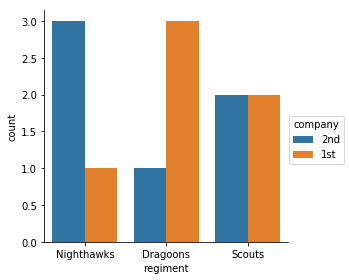

In [20]:
sns.factorplot(x="regiment", hue="company", data=army_df, kind="count")

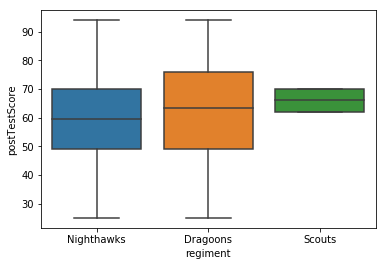

In [22]:
sns.boxplot(x="regiment", y="postTestScore", data=army_df)
